<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....

#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# check if nulls exist
movies.info()  # 3 nulls exist in content_rating column

# calculate the mean duration
movies.duration.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Sort to find the shortest movie
movies.sort_values('duration').head(1)

star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...

In [7]:
# Sort to find the longest movie
movies.sort_values('duration').tail(1)

star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...

#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [8]:
# Summarise data to decide on the number of bins
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

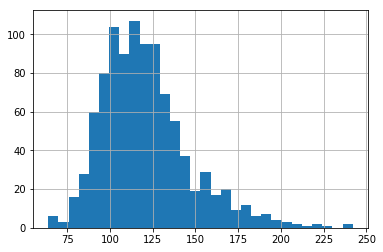

In [9]:
movies.duration.hist(bins=30);

#### Use a box plot to display that same data.

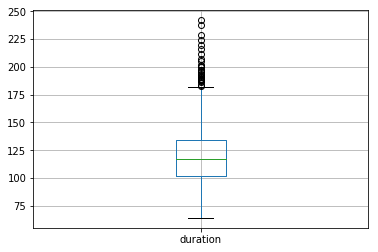

In [10]:
movies.boxplot(column='duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
movies[['content_rating','title']].groupby('content_rating').count()

title
content_rating       
APPROVED           47
G                  32
GP                  3
NC-17               7
NOT RATED          65
PASSED              7
PG                123
PG-13             189
R                 460
TV-MA               1
UNRATED            38
X                   4

#### Use a visualization to display that same data, including a title and x and y labels.

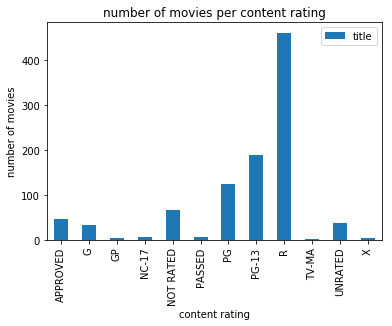

In [12]:
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar');
plt.xlabel('content rating');
plt.ylabel('number of movies');
plt.title('number of movies per content rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Make a dataframe copy before converting contents
movies_copy = movies.copy()

In [14]:
# Convert content ratings in dataframe copy
movies_copy.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED',inplace=True);


In [15]:
# Check content ratings conversion
movies_copy.content_rating.value_counts().sort_index()

G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: content_rating, dtype: int64

In [16]:
# Check with original dataframe after content rating conversion
movies.content_rating.value_counts().sort_index()

APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Convert content ratings in dataframe copy
movies_copy.content_rating.replace(['X','TV-MA'],'NC-17',inplace=True);


In [18]:
# Check content ratings conversion
movies_copy.content_rating.value_counts().sort_index()

G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: content_rating, dtype: int64

In [19]:
# Check with original dataframe after content rating conversion
movies.content_rating.value_counts().sort_index()

APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [20]:
# Count the number of missing values in original dataframe
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [21]:
# Count the number of missing values in dataframe copy
movies_copy.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [22]:
# Display rows with missing values in original dataframe
movies[movies.content_rating.isnull()]

star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']

In [23]:
# Display rows with missing values in dataframe copy
movies_copy[movies_copy.content_rating.isnull()]

star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']

In [24]:
# Fill in the missing content rating in row 187 in dataframe copy
movies_copy.loc[187,'content_rating'] = 'PG'

In [25]:
# Fill in the missing content rating in row 649 in dataframe copy
movies_copy.loc[649,'content_rating'] = 'PG'

In [26]:
# Fill in the missing content rating in row 936 in dataframe copy
movies_copy.loc[936,'content_rating'] = 'G'

In [27]:
# Check NaN in row 187,649,936 replaced in dataframe copy
movies_copy.iloc[[187,649,936],:]

star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid             PG   
649          7.7                   Where Eagles Dare             PG   
936          7.4                           True Grit              G   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [28]:
# Calculate average star rating for movies 120 min or longer
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [29]:
# Calculate average star rating for movies shorter than 120 min
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

In [30]:
# Print the difference in average star ratings
print(movies[movies.duration >= 120].star_rating.mean() - movies[movies.duration < 120].star_rating.mean())

0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

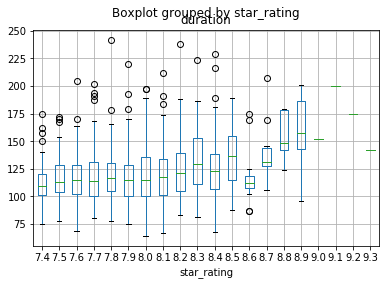

In [31]:
movies.boxplot(column='duration', by='star_rating');

#### Calculate the average duration for each genre.

In [32]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

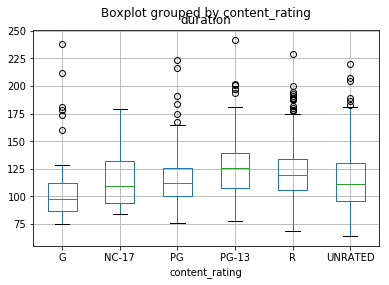

In [33]:
# Using content rating in dataframe copy
movies_copy.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [34]:
# Sort dataframe by genre and then by star rating
movies_sorted = movies.sort_values(['genre','star_rating'],ascending=[True,False])
movies_sorted

star_rating                                           title  \
3            9.0                                 The Dark Knight   
11           8.8                                       Inception   
12           8.8  Star Wars: Episode V - The Empire Strikes Back   
19           8.7                                       Star Wars   
20           8.7                                      The Matrix   
36           8.6                             Saving Private Ryan   
37           8.6                         Raiders of the Lost Ark   
43           8.5                           The Dark Knight Rises   
44           8.5                                       Gladiator   
45           8.5                      Terminator 2: Judgment Day   
75           8.4                                          Aliens   
80           8.4      Star Wars: Episode VI - Return of the Jedi   
82           8.4                                      Braveheart   
96           8.4                                         Yojimbo   
100          8.3                The Treasure of the Sierra Madre   
113          8.3                                   Batman Begins   
118          8.3              Indiana Jones and the Last Crusade   
123          8.3                                     The General   
129          8.3                                             Ran   
135          8.3                                            Heat   
138          8.3                                        Die Hard   
152          8.2                                  V for Vendetta   
163          8.2                                            Rush   
173          8.2              Tae Guk Gi: The Brotherhood of War   
177          8.2                                    The Avengers   
194          8.1                    Kingsman: The Secret Service   
196          8.1                         Guardians of the Galaxy   
198          8.1                               Kill Bill: Vol. 1   
235          8.1                                         Yip Man   
239          8.1                   Elite Squad: The Enemy Within   
..           ...                                             ...   
244          8.1                                  Shutter Island   
249          8.1                                          Sleuth   
264          8.1                                  Twelve Monkeys   
292          8.1                        The Manchurian Candidate   
467          7.9                                    The 39 Steps   
583          7.8                                       Dark City   
742          7.6                                       Following   
863          7.5                        Three Days of the Condor   
866          7.5                                To Catch a Thief   
894          7.5                                     Source Code   
965          7.4                                       Limitless   
145          8.2                                    Blade Runner   
321          8.0                                          Brazil   
408          7.9                                         Gravity   
484          7.8                   The Day the Earth Stood Still   
637          7.7                            The Butterfly Effect   
350          8.0                               Shadow of a Doubt   
496          7.8                                          Misery   
728          7.6                              La piel que habito   
848          7.5                       The Man Who Knew Too Much   
902          7.5                                          Frenzy   
6            8.9                  The Good, the Bad and the Ugly   
26           8.6                    Once Upon a Time in the West   
59           8.5                                Django Unchained   
107          8.3                          For a Few Dollars More   
119          8.3                                      Unforgiven   
236          8.1                                       High N

In [35]:
# Get the first row of each genre in sorted dataframe 
movies_sorted.groupby('genre').first()

star_rating                                          title  \
genre                                                                   
Action             9.0                                The Dark Knight   
Adventure          8.9  The Lord of the Rings: The Return of the King   
Animation          8.6                                  Spirited Away   
Biography          8.9                               Schindler's List   
Comedy             8.6                              Life Is Beautiful   
Crime              9.3                       The Shawshank Redemption   
Drama              8.9                                   12 Angry Men   
Family             7.9                     E.T. the Extra-Terrestrial   
Fantasy            7.7                      The City of Lost Children   
Film-Noir          8.3                                  The Third Man   
History            8.0                            Battleship Potemkin   
Horror             8.6                                         Psycho   
Mystery            8.6                                    Rear Window   
Sci-Fi             8.2                                   Blade Runner   
Thriller           8.0                              Shadow of a Doubt   
Western            8.9                 The Good, the Bad and the Ugly   

          content_rating  duration  \
genre                                
Action             PG-13       152   
Adventure          PG-13       201   
Animation             PG       125   
Biography              R       195   
Comedy             PG-13       116   
Crime                  R       142   
Drama          NOT RATED        96   
Family                PG       115   
Fantasy                R       112   
Film-Noir      NOT RATED        93   
History          UNRATED        66   
Horror                 R       109   
Mystery         APPROVED       112   
Sci-Fi                 R       117   
Thriller        APPROVED       108   
Western        NOT RATED       161   

                                                 actors_list  
genre                                                         
Action     [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
Adventure  [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...  
Animation  [u'Daveigh Chase', u'Suzanne Pleshette', u'Miy...  
Biography  [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...  
Comedy     [u'Roberto Benigni', u'Nicoletta Braschi', u'G...  
Crime      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
Drama      [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...  
Family     [u'Henry Thomas', u'Drew Barrymore', u'Peter C...  
Fantasy    [u'Ron Perlman', u'Daniel Emilfork', u'Judith ...  
Film-Noir  [u'Orson Welles', u'Joseph Cotten', u'Alida Va...  
History    [u'Aleksandr Antonov', u'Vladimir Barsky', u'G...  
Horror     [u'Anthony Perkins', u'Janet Leigh', u'Vera Mi...  
Mystery    [u'James Stewart', u'Grace Kelly', u'Wendell C...  
Sci-Fi     [u'Harrison Ford', u'Rutger Hauer', u'Sean You...  
Thriller   [u'Teresa Wright', u'Joseph Cotten', u'Macdona...  
Western    [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [36]:
# Check for multiple movies with the same title
title_duplicates = movies[movies.title.duplicated()]
title_duplicates

star_rating                            title content_rating      genre  \
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit            NaN  Adventure   

     duration                                        actors_list  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
905       128  [u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...  
924       134  [u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...  
936       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']

In [37]:
# Display and sort all rows with the same titles above 
movies[movies.title.isin(title_duplicates.title)].sort_values('title')

# These movies are actually not duplicates

star_rating                            title content_rating      genre  \
703          7.6                          Dracula       APPROVED     Horror   
905          7.5                          Dracula              R     Horror   
678          7.7                   Les Miserables          PG-13      Drama   
924          7.5                   Les Miserables          PG-13      Crime   
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
936          7.4                        True Grit            NaN  Adventure   

     duration                                        actors_list  
703        85  [u'Bela Lugosi', u'Helen Chandler', u'David Ma...  
905       128  [u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...  
678       158  [u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...  
924       134  [u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
936       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [38]:
# Count the number of occurrences for each genre
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [39]:
# Create a list of relevant genres
genres_relevant_1 = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']


In [40]:
# Filter movies using the list of relevant genres
movies_relevant_1 = movies[movies.genre.isin(genres_relevant_1)]
movies_relevant_1

star_rating                                              title  \
0            9.3                           The Shawshank Redemption   
1            9.2                                      The Godfather   
2            9.1                             The Godfather: Part II   
3            9.0                                    The Dark Knight   
4            8.9                                       Pulp Fiction   
5            8.9                                       12 Angry Men   
7            8.9      The Lord of the Rings: The Return of the King   
8            8.9                                   Schindler's List   
9            8.9                                         Fight Club   
10           8.8  The Lord of the Rings: The Fellowship of the Ring   
11           8.8                                          Inception   
12           8.8     Star Wars: Episode V - The Empire Strikes Back   
13           8.8                                       Forrest Gump   
14           8.8              The Lord of the Rings: The Two Towers   
15           8.7                                       Interstellar   
16           8.7                    One Flew Over the Cuckoo's Nest   
17           8.7                                      Seven Samurai   
18           8.7                                         Goodfellas   
19           8.7                                          Star Wars   
20           8.7                                         The Matrix   
21           8.7                                        City of God   
22           8.7                              It's a Wonderful Life   
23           8.7                                 The Usual Suspects   
24           8.7                                              Se7en   
25           8.6                                  Life Is Beautiful   
27           8.6                           The Silence of the Lambs   
28           8.6                             Leon: The Professional   
29           8.6                                        City Lights   
30           8.6                                      Spirited Away   
31           8.6                                   The Intouchables   
..           ...                                                ...   
949          7.4                                         Home Alone   
950          7.4                                              Bound   
951          7.4                                      Sleepy Hollow   
952          7.4                                       Pirate Radio   
953          7.4                              The NeverEnding Story   
954          7.4                                              X-Men   
955          7.4                                   Zero Dark Thirty   
956          7.4                           Manhattan Murder Mystery   
957          7.4                        National Lampoon's Vacation   
958          7.4                                 My Sister's Keeper   
959          7.4                               Deconstructing Harry   
960          7.4                                   The Way Way Back   
961          7.4                                             Capote   
962          7.4                                 Driving Miss Daisy   
963          7.4                                    La Femme Nikita   
964          7.4                                            Lincoln   
965          7.4                                          Limitless   
966          7.4                                 The Simpsons Movie   
967          7.4                                           The Rock   
968          7.4                                The English Patient   
969          7.4                                Law Abiding Citizen   
970          7.4                                        Wonder Boys   
971          7.4                                 Death at a Funeral   
972          7.4                                     Blue Valentine   
973          7.4             

In [41]:
# Calculate the average star rating for each relevant genre
movies_relevant_1.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [42]:
# Save the number of occurrences for each genre as a series
genres_counts = movies.genre.value_counts()
genres_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [43]:
# Filter the relevant genres using boolean indexing
genres_relevant_2 = genres_counts[genres_counts >= 10]
genres_relevant_2

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [44]:
# Convert Pandas Series to List
genres_relevant_2 = genres_relevant_2.index.tolist()
genres_relevant_2

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [45]:
# Filter the relevant movies
movies_relevant_2 = movies[movies.genre.isin(genres_relevant_2)]
movies_relevant_2

star_rating                                              title  \
0            9.3                           The Shawshank Redemption   
1            9.2                                      The Godfather   
2            9.1                             The Godfather: Part II   
3            9.0                                    The Dark Knight   
4            8.9                                       Pulp Fiction   
5            8.9                                       12 Angry Men   
7            8.9      The Lord of the Rings: The Return of the King   
8            8.9                                   Schindler's List   
9            8.9                                         Fight Club   
10           8.8  The Lord of the Rings: The Fellowship of the Ring   
11           8.8                                          Inception   
12           8.8     Star Wars: Episode V - The Empire Strikes Back   
13           8.8                                       Forrest Gump   
14           8.8              The Lord of the Rings: The Two Towers   
15           8.7                                       Interstellar   
16           8.7                    One Flew Over the Cuckoo's Nest   
17           8.7                                      Seven Samurai   
18           8.7                                         Goodfellas   
19           8.7                                          Star Wars   
20           8.7                                         The Matrix   
21           8.7                                        City of God   
22           8.7                              It's a Wonderful Life   
23           8.7                                 The Usual Suspects   
24           8.7                                              Se7en   
25           8.6                                  Life Is Beautiful   
27           8.6                           The Silence of the Lambs   
28           8.6                             Leon: The Professional   
29           8.6                                        City Lights   
30           8.6                                      Spirited Away   
31           8.6                                   The Intouchables   
..           ...                                                ...   
949          7.4                                         Home Alone   
950          7.4                                              Bound   
951          7.4                                      Sleepy Hollow   
952          7.4                                       Pirate Radio   
953          7.4                              The NeverEnding Story   
954          7.4                                              X-Men   
955          7.4                                   Zero Dark Thirty   
956          7.4                           Manhattan Murder Mystery   
957          7.4                        National Lampoon's Vacation   
958          7.4                                 My Sister's Keeper   
959          7.4                               Deconstructing Harry   
960          7.4                                   The Way Way Back   
961          7.4                                             Capote   
962          7.4                                 Driving Miss Daisy   
963          7.4                                    La Femme Nikita   
964          7.4                                            Lincoln   
965          7.4                                          Limitless   
966          7.4                                 The Simpsons Movie   
967          7.4                                           The Rock   
968          7.4                                The English Patient   
969          7.4                                Law Abiding Citizen   
970          7.4                                        Wonder Boys   
971          7.4                                 Death at a Funeral   
972          7.4                                     Blue Valentine   
973          7.4             

In [46]:
# Calculate the average star rating for the relevant genres
movies_relevant_2.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [47]:
# Calculate the average star rating for all genres
movies_agg1 = movies.groupby('genre').star_rating.mean()
movies_agg1

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [48]:
# Filter genres with at least 10 movies using boolean series
movies_agg1[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [49]:
# Aggregate by count and mean
movies_agg2 = movies.groupby('genre').star_rating.agg(['count','mean'])
movies_agg2

count      mean
genre                     
Action       136  7.884559
Adventure     75  7.933333
Animation     62  7.914516
Biography     77  7.862338
Comedy       156  7.822436
Crime        124  7.916935
Drama        278  7.902518
Family         2  7.850000
Fantasy        1  7.700000
Film-Noir      3  8.033333
History        1  8.000000
Horror        29  7.806897
Mystery       16  7.975000
Sci-Fi         5  7.920000
Thriller       5  7.680000
Western        9  8.255556

In [50]:
# Filter using the count
movies_agg2[movies_agg2['count'] >= 10]

count      mean
genre                     
Action       136  7.884559
Adventure     75  7.933333
Animation     62  7.914516
Biography     77  7.862338
Comedy       156  7.822436
Crime        124  7.916935
Drama        278  7.902518
Horror        29  7.806897
Mystery       16  7.975000

## Bonus

#### Figure out something "interesting" using the actors data!

In [51]:
# Define a function to transform a string into a list
def transform(string_raw):
    string_cleaned = string_raw.replace("[","").replace("]","").replace("u","").replace("'","")
    list_elements = string_cleaned.split(", ")
    return list_elements

transform("[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']")

['Tim Robbins', 'Morgan Freeman', 'Bob Gnton']

In [52]:
# Transform each string in actors_list into a list of actors' names
movies.actors_list.apply(transform)[0]

['Tim Robbins', 'Morgan Freeman', 'Bob Gnton']

In [53]:
# Count the number of movies acted by each actor
i = 0
list_actors = []
while i < 979:
    list_temp = movies.actors_list.apply(transform)[i]
    list_actors.extend(list_temp)
    i += 1

dict_actors = {}
for actor in list_actors:
    count_actor = list_actors.count(actor)
    dict_actors[actor] = count_actor
    
dict_actors

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gnton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Dvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thrman': 5,
 'Samel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaghey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Loise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifne': 3,
 'Takashi Shimra': 2,
 'Keik